# Алгоритм DBSCAN

Основанная на плотности пространственная кластеризация для приложений с шумами (англ. Density-based spatial clustering of applications with noise, DBSCAN) — это алгоритм кластеризации, основанной на плотности — если дан набор точек в некотором пространстве, алгоритм группирует вместе точки, которые тесно расположены, помечая как выбросы точки, которые находятся одиноко в областях с малой плотностью. DBSCAN является одним из наиболее часто используемых алгоритмов кластеризации.

# Лабораторная работа

In [1]:
# Используемые библиотеки

import numpy as np
from sklearn import datasets
from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

#inline matplotlib

In [2]:
# Генерируем датасет

X, _ = datasets.make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=0)

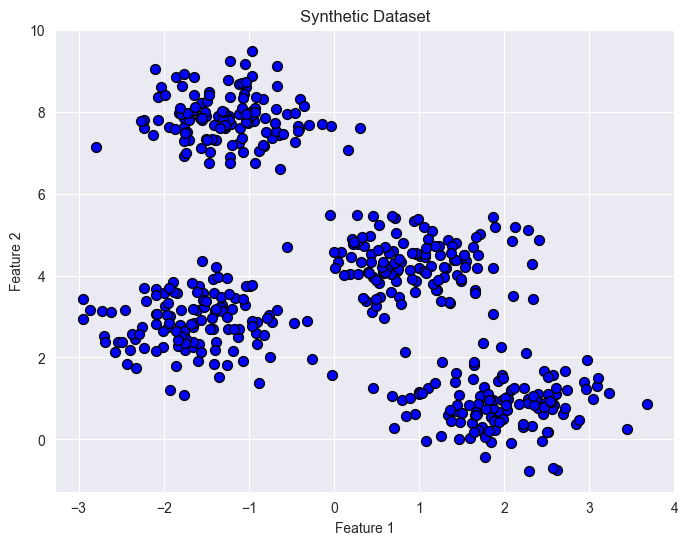

In [3]:
# До кластеризации

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [4]:
# Обучение DBSCAN на разных значениях eps и min_samples

eps_values = [0.3, 0.4, 0.5, 0.6, 0.7, 1.0, 2.0]
min_samples_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        if len(np.unique(clusters)) > 1:
            silhouette_avg = silhouette_score(X, clusters)
            silhouette_scores[i, j] = silhouette_avg

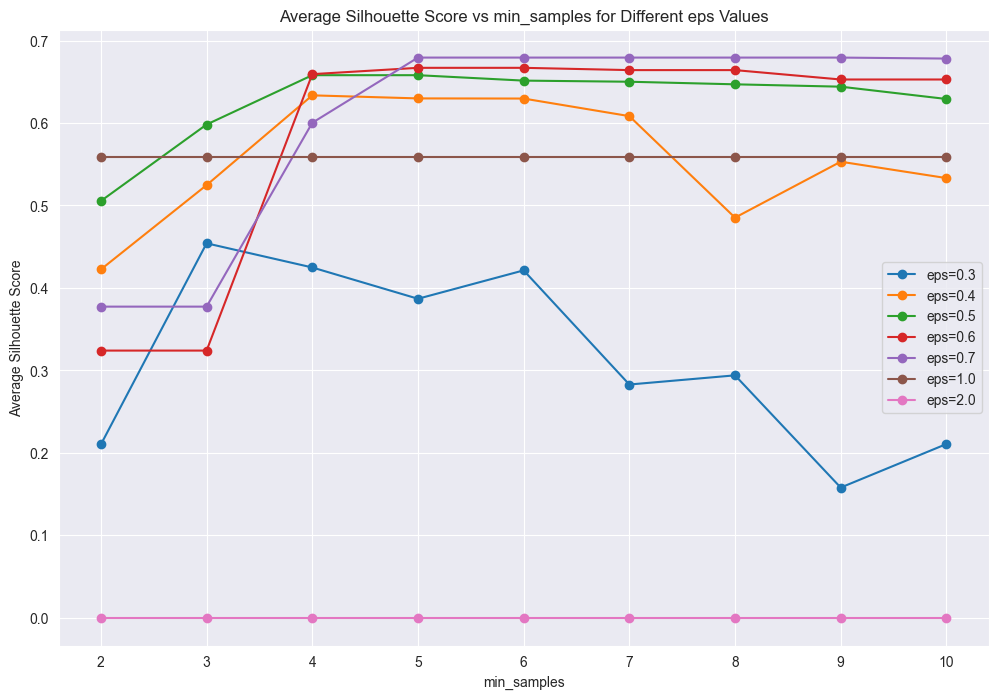

In [5]:
# График изменения среднего коэффициента силуэта в зависимости от min_samples при разных значениях eps

plt.figure(figsize=(12, 8))
for i, eps in enumerate(eps_values):
    plt.plot(min_samples_values, silhouette_scores[i], marker='o', label=f'eps={eps}')
plt.title('Average Silhouette Score vs min_samples for Different eps Values')
plt.xlabel('min_samples')
plt.ylabel('Average Silhouette Score')
plt.legend()
plt.grid(True)

In [6]:
# Обучение DBSCAN на оптимальных параметрах

best_eps_index, best_min_samples_index = np.unravel_index(np.argmax(silhouette_scores), silhouette_scores.shape)
best_eps = eps_values[best_eps_index]
best_min_samples = min_samples_values[best_min_samples_index]

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
cluster_labels = dbscan.fit_predict(X)

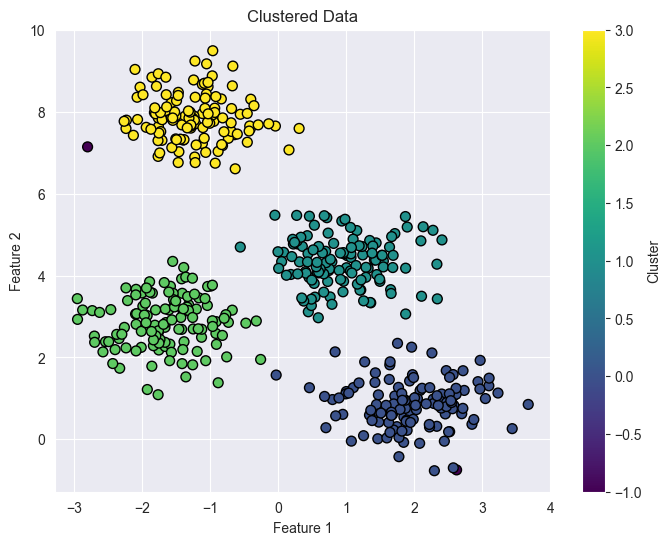

In [7]:
# После кластеризации для оптимальных параметров

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='black', s=50)
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

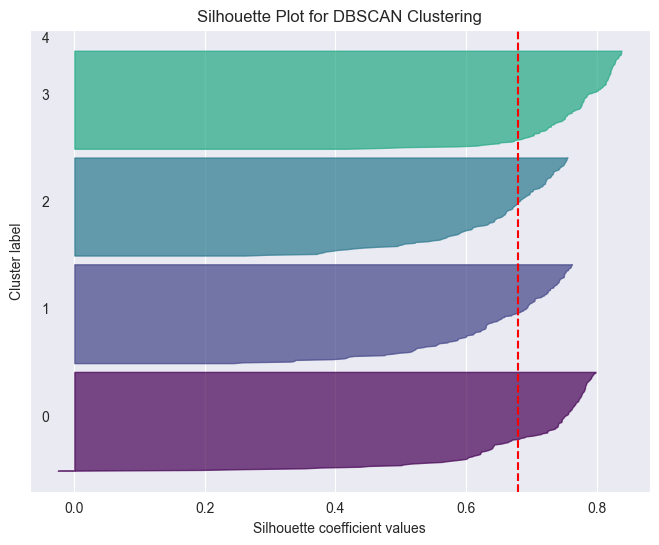

In [8]:
# Строим графики силуэтов

silhouette_values = silhouette_samples(X, cluster_labels)

plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(len(np.unique(cluster_labels))):
    cluster_silhouette_values = silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / len(np.unique(cluster_labels)))
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title('Silhouette Plot for DBSCAN Clustering')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster label')
plt.axvline(x=silhouette_score(X, cluster_labels), color="red", linestyle="--")
plt.yticks([])
plt.show()